<a href="https://colab.research.google.com/github/Toxxi-frank/4fun/blob/main/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import nessecery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# list of dataset already in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [7]:
# set style
sns.set_theme()
# it will look better while visualization

In [3]:
# using dataset named tips and assign to tips_df
tips_df = sns.load_dataset('tips')

In [4]:
# see 5 first data
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


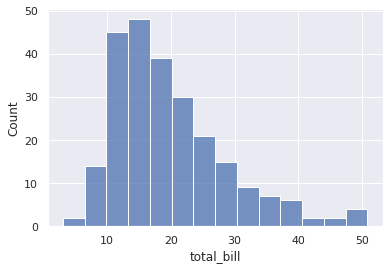

In [8]:
# plot with hist, data=total_bill
sns.histplot(data=tips_df['total_bill']);

# y goes with count 

In [15]:
# see how many unique bill and sort it
unique_bill = tips_df['total_bill'].value_counts().sort_values(ascending=False)
# by default (not using sort_values), it is already sort from highest to lowest

In [14]:
unique_bill

10.51    1
13.27    1
22.12    1
48.27    1
40.17    1
        ..
20.69    2
10.07    2
10.34    2
15.69    2
13.42    3
Name: total_bill, Length: 229, dtype: int64

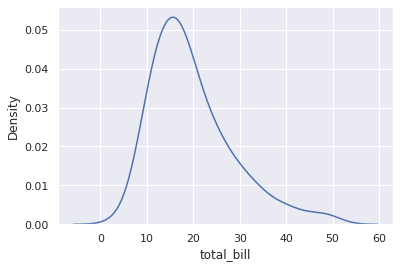

In [17]:
# same plot above but using kde
sns.kdeplot(data=tips_df['total_bill']);

# y goes with density 

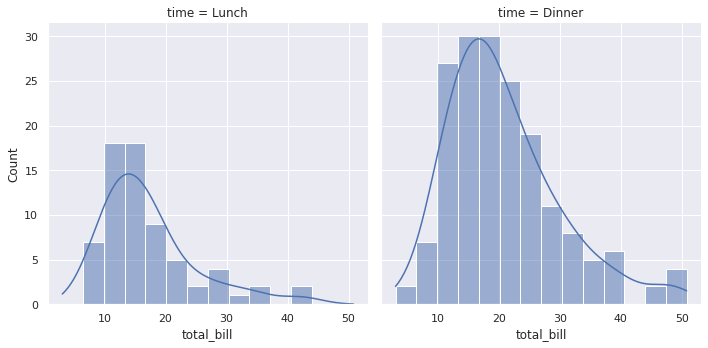

In [19]:
# using displot with x=total_bill, col=time, kde=True
sns.displot(data=tips_df, x='total_bill', col='time', kde=True);

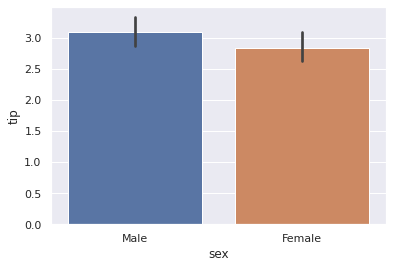

In [22]:
# using barplot with data, x=sex, y=tip, estimate=np.mean
sns.barplot(data=tips_df, x='sex', y='tip', estimator=np.mean);

In [23]:
# male > female (number)
tips_df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

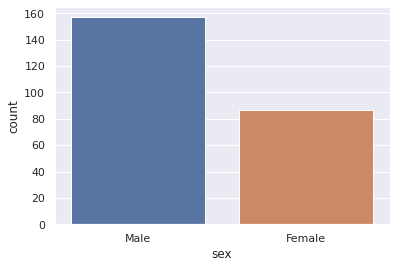

In [24]:
# countplot with data, x=sex
# visualize above

sns.countplot(data=tips_df, x='sex');

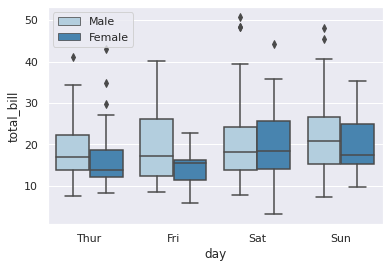

In [32]:
# boxplot with data, x=day, y=total_bill, hue=sex, palette=Blues and plt.legend with loc=0
sns.boxplot(data=tips_df, x='day', y='total_bill', hue='sex', palette='Blues');
plt.legend(loc=0);


In [26]:
tips_df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

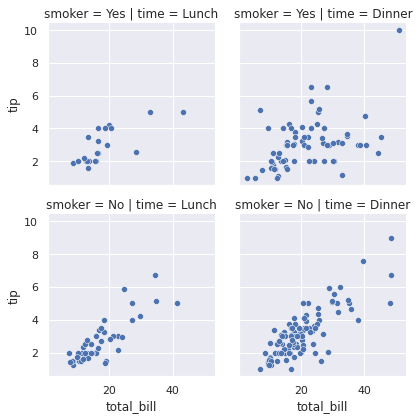

In [35]:
# FaceGrid with data, row=smoker, col=time using scatter with x=total_bill,y=tip
face_grid = sns.FacetGrid(data=tips_df, row='smoker', col='time');
face_grid.map(sns.scatterplot, 'total_bill', 'tip');

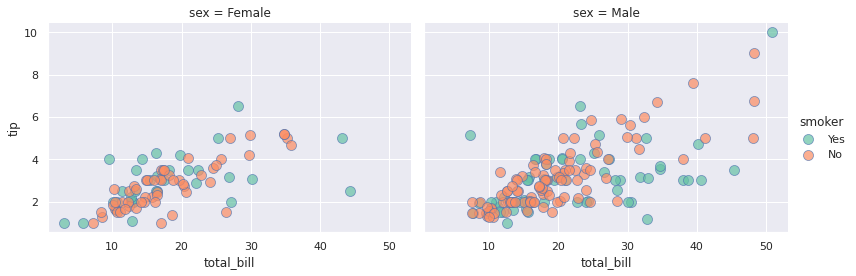

In [40]:
kws = dict(s=100, edgecolor='b', alpha=.7)
# using FaceGrid with data, col=sex, hue=smoker, col_order, palette=Set2, height=4, aspect=1.4, legend_out=TRue
new_fg = sns.FacetGrid(data=tips_df, col='sex', hue='smoker',col_order=['Female','Male'], palette='Set2', height=4, aspect=1.4, legend_out=True);
# assign it to new_fg and using scatter as same above + **kw
new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws);
new_fg.add_legend();


In [41]:
# using new dataset named peguins and name it penguins_df
# see first 5 data
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


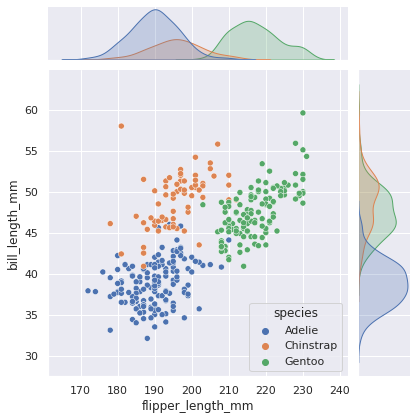

In [43]:
# joinplot with data, x=flipper, y=bill, hue=species
sns.jointplot(data=penguins_df, x='flipper_length_mm', y='bill_length_mm', hue='species');

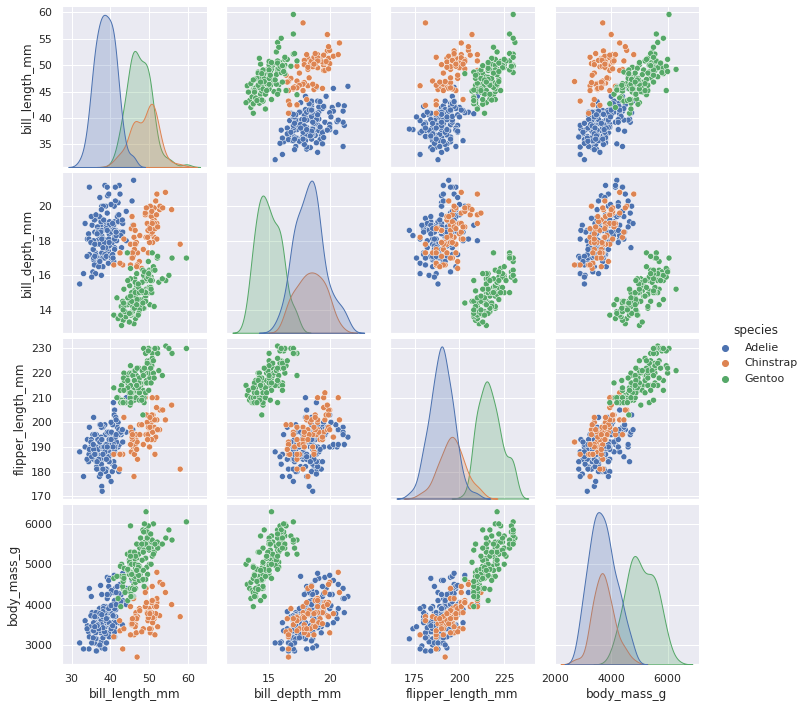

In [44]:
# pairplot with data, hue=species
sns.pairplot(data=penguins_df, hue='species')

In [45]:
# using new dataset named flights and name it flights_df
# see first 5 data
flights_df = sns.load_dataset('flights')
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [46]:
# new_df named flights = pd.pivot_table(data, index=month, columns=year, values))
flights = pd.pivot_table(data=flights_df, index='month', columns='year', values='passengers')

In [47]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


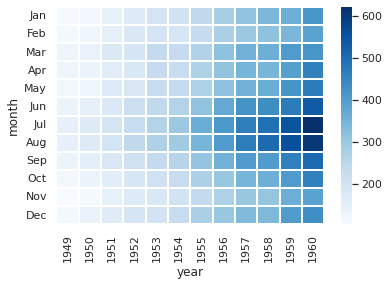

In [49]:
# heatmap with new_data, cmap=Blues, linecolor, linewidths
sns.heatmap(flights, cmap="Blues", linecolor='white', linewidths=1);

# Big_part

In [50]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
# load dataset cereal n assign it to cereal_df
cereal_df = pd.read_csv('/content/drive/MyDrive/cereal.csv')

In [52]:
# see first 5
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [53]:
cereal_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [54]:
# drop last 4 columns
cereal_df.drop(columns=['shelf', 'weight', 'cups',
       'rating'], inplace=True)

In [55]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [60]:
# corr and assign to cereal_corr
cereal_corr = cereal_df.corr()

In [61]:
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [62]:
# create one_corr = matrix 1 same size cereal_corr and dtype=bool
one_corr = np.ones_like(cereal_corr,dtype='bool')


In [63]:
one_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [64]:
# check shape of one_corr, cereal_corr
one_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [65]:
# create mask with np.triu
mask = np.triu(one_corr)

In [66]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

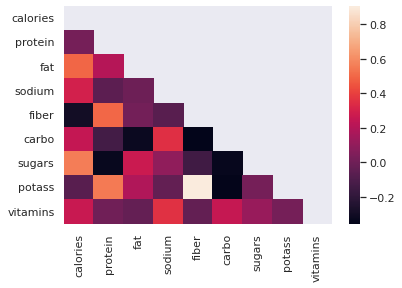

In [68]:
# heatmap with data=cereal_corr, mask
sns.heatmap(data=cereal_corr, mask = mask);

In [71]:
# adjusted_mask
adjusted_mask = mask[1:, :-1]

In [72]:
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [74]:
# adjust_cereal_corr
adjust_cereal_corr = cereal_corr.iloc[1:, :-1]

In [75]:
adjust_cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699


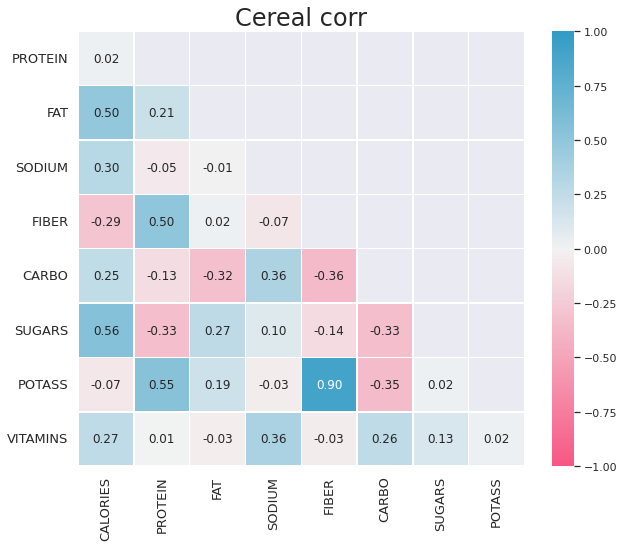

In [82]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# sns.heatmap with addition_param: annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap=cmap,
            #vmin=-1, vmax=1,
            #linecolor='white', linewidths=0.5
sns.heatmap(data=adjust_cereal_corr, mask=adjusted_mask, annot=True, linecolor='white', linewidths=0.5,
            cmap=cmap, vmin=-1, vmax=1, fmt='.2f');
# yticks,xticks = upper
yticks = [i.upper() for i in adjust_cereal_corr.index]
xticks = [i.upper() for i in adjust_cereal_corr.columns]
# set ax.set_y(x)ticklabels with param = ...., fontsize, rotation
ax.set_yticklabels(yticks, fontsize=13, rotation=0)
ax.set_xticklabels(xticks, fontsize=13, rotation=90)
# set title(name, loc=left, fontsize)
title = 'Cereal corr'
ax.set_title(title, fontsize=24);